In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
pd.set_option('display.max_columns', None)
df = pd.read_csv('/Users/oliviafowler/Downloads/Simplified_PIT_data.csv')
df.head()

,CoC Number,CoC Name,Count Types,Year,Sheltered Total Homeless,Sheltered Total Homeless - Under 18,Sheltered Total Homeless - Age 18 to 24,Sheltered Total Homeless - Over 24,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Sheltered Total Homeless - Gender that is not Singularly Female or Male,Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Sheltered Total Homeless - Hispanic/Latin(o)(a)(x),Sheltered Total Homeless - White,"Sheltered Total Homeless - Black, African American, or African",Sheltered Total Homeless - Asian or Asian American,"Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous",Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander,Sheltered Total Homeless - Multiple Races,Unsheltered Homeless,Unsheltered Homeless - Under 18,Unsheltered Homeless - Age 18 to 24,Unsheltered Homeless - Over 24,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender,Unsheltered Homeless - Gender that is not Singularly Female or Male,Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Unsheltered Homeless - Hispanic/Latin(o)(a)(x),Unsheltered Homeless - White,"Unsheltered Homeless - Black, African American, or African",Unsheltered Homeless - Asian or Asian American,"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous",Unsheltered Homeless - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless - Multiple Races,Sheltered Total Homeless - Gender Questioning,Unsheltered Homeless - Gender Questioning
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,973,170,119,684,409,559,4,1,899,74,307,108,10,387,56,105,155,0,14,141,36,119,0,0,152,3,44,15,0,81,1,14,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,578,135,47,396,280,298,0,0,556,22,227,24,10,243,11,63,139,0,6,133,40,99,0,0,136,3,63,0,0,59,1,16,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,875,104,80,691,286,585,4,0,861,14,262,582,1,10,1,19,217,0,45,172,48,153,15,1,214,3,68,144,0,0,0,5,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,341,106,23,212,157,184,0,0,331,10,146,185,3,3,0,4,265,10,12,243,65,199,1,0,257,8,127,129,1,3,0,5,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,133,0,7,126,67,65,0,1,130,3,92,5,0,0,0,36,22,0,1,21,5,16,0,1,22,0,20,2,0,0,0,0,NaN,NaN


# CoC's with the highest Sheltered Total Homeless

In [2]:
df.pivot_table(index="CoC Name", values='Sheltered Total Homeless', aggfunc="sum").sort_values(by="Sheltered Total Homeless", ascending=False).head()

,Sheltered Total Homeless
CoC Name,
New York City CoC,420911
Los Angeles City & County CoC,94217
Seattle/King County CoC,34960
Boston CoC,32792
District of Columbia CoC,32670


# CoC's with the highest Unsheltered Total Homeless

In [3]:
df.pivot_table(index="CoC Name", values='Unsheltered Homeless', aggfunc="sum").sort_values(by="Unsheltered Homeless", ascending=False).head()

,Unsheltered Homeless
CoC Name,
Los Angeles City & County CoC,210479
San Jose/Santa Clara City & County CoC,34448
Seattle/King County CoC,30296
"Oakland, Berkeley/Alameda County CoC",27485
San Francisco CoC,23463


# Sheltered Total Homeless Under the Age of 18 total count

In [4]:
df.pivot_table(index="CoC Name", values='Sheltered Total Homeless - Under 18', aggfunc="sum").sort_values(by="Sheltered Total Homeless - Under 18", ascending=False).head()

,Sheltered Total Homeless - Under 18
CoC Name,
New York City CoC,136618
Los Angeles City & County CoC,28384
Boston CoC,12295
"Nassau, Suffolk Counties CoC",9237
Seattle/King County CoC,9009


# Added a state column from the first two characters in the CoC column and made a new CSV file.

In [5]:
# Get the "CoC Number" column
states = df["CoC Number"]

newStates = []

# Iterate over the values in the "CoC Number" column
for s in states:  # states is already a Series, so no need for ["CoC Number"]
    newStates.append(s[0:2])  # Extract the first two characters

# Add the newStates list back as a column in the DataFrame
df['State'] = newStates

df.to_csv('statesDF.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head()


,CoC Number,CoC Name,Count Types,Year,Sheltered Total Homeless,Sheltered Total Homeless - Under 18,Sheltered Total Homeless - Age 18 to 24,Sheltered Total Homeless - Over 24,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Sheltered Total Homeless - Gender that is not Singularly Female or Male,Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Sheltered Total Homeless - Hispanic/Latin(o)(a)(x),Sheltered Total Homeless - White,"Sheltered Total Homeless - Black, African American, or African",Sheltered Total Homeless - Asian or Asian American,"Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous",Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander,Sheltered Total Homeless - Multiple Races,Unsheltered Homeless,Unsheltered Homeless - Under 18,Unsheltered Homeless - Age 18 to 24,Unsheltered Homeless - Over 24,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender,Unsheltered Homeless - Gender that is not Singularly Female or Male,Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Unsheltered Homeless - Hispanic/Latin(o)(a)(x),Unsheltered Homeless - White,"Unsheltered Homeless - Black, African American, or African",Unsheltered Homeless - Asian or Asian American,"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous",Unsheltered Homeless - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless - Multiple Races,Sheltered Total Homeless - Gender Questioning,Unsheltered Homeless - Gender Questioning,State
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,973,170,119,684,409,559,4,1,899,74,307,108,10,387,56,105,155,0,14,141,36,119,0,0,152,3,44,15,0,81,1,14,NaN,NaN,AK
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,578,135,47,396,280,298,0,0,556,22,227,24,10,243,11,63,139,0,6,133,40,99,0,0,136,3,63,0,0,59,1,16,NaN,NaN,AK
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,875,104,80,691,286,585,4,0,861,14,262,582,1,10,1,19,217,0,45,172,48,153,15,1,214,3,68,144,0,0,0,5,NaN,NaN,AL
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,341,106,23,212,157,184,0,0,331,10,146,185,3,3,0,4,265,10,12,243,65,199,1,0,257,8,127,129,1,3,0,5,NaN,NaN,AL
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,133,0,7,126,67,65,0,1,130,3,92,5,0,0,0,36,22,0,1,21,5,16,0,1,22,0,20,2,0,0,0,0,NaN,NaN,AL


# Made Unsheltered and Sheltered pivot tables that can be made into hist plots

In [6]:
unsheltered = df.pivot_table(index="State", values='Unsheltered Homeless', aggfunc="sum").sort_values(by="Unsheltered Homeless", ascending=False).head()

In [7]:
sheltereddf = df.pivot_table(index="State", values='Sheltered Total Homeless', aggfunc="sum").sort_values(by="Sheltered Total Homeless", ascending=False).head()

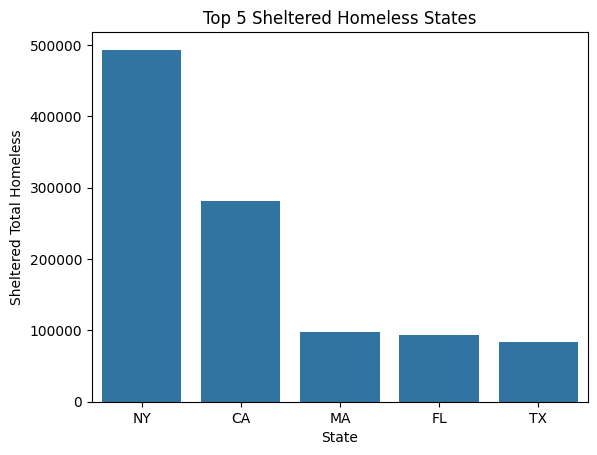

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(sheltereddf, x = 'State', y='Sheltered Total Homeless')
plt.title('Top 5 Sheltered Homeless States')
plt.show()

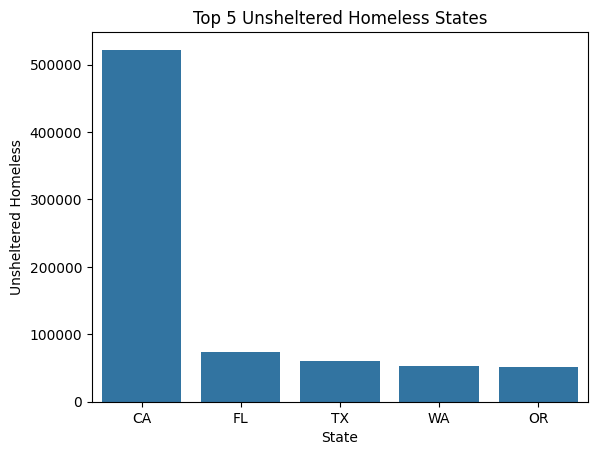

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(unsheltered, x = 'State', y='Unsheltered Homeless')
plt.title('Top 5 Unsheltered Homeless States')
plt.show()

A data frame that is filtered down to jsut the coldest 20 states in the US. Source for state tempuratures: https://www.datapandas.org/ranking/coldest-states and https://www.theblogler.com/coldest-states/ 

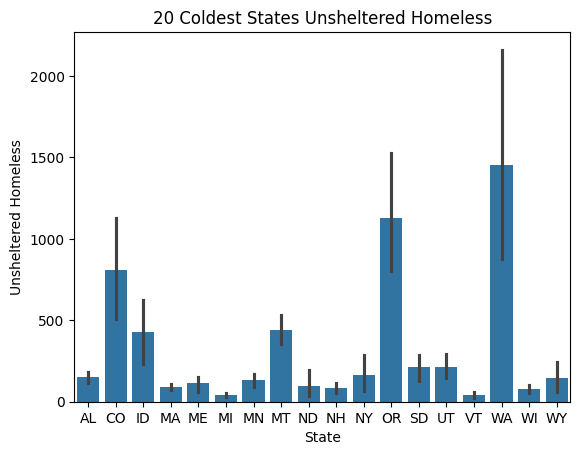

In [10]:
coldDF = df[df["State"].isin(["AL","ND","MN","ME","WY","MT","VT","ID","WI","NH","MI","SD","NY","CO","WA","OR","IO","MA","UT","MA"])]

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(coldDF, x = 'State', y='Unsheltered Homeless')
plt.title('20 Coldest States Unsheltered Homeless')
plt.show()

# Now looking at utah specifically 

In [11]:
utahDF = df[df["State"] == 'UT']

utahDF.head()

,CoC Number,CoC Name,Count Types,Year,Sheltered Total Homeless,Sheltered Total Homeless - Under 18,Sheltered Total Homeless - Age 18 to 24,Sheltered Total Homeless - Over 24,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Sheltered Total Homeless - Gender that is not Singularly Female or Male,Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Sheltered Total Homeless - Hispanic/Latin(o)(a)(x),Sheltered Total Homeless - White,"Sheltered Total Homeless - Black, African American, or African",Sheltered Total Homeless - Asian or Asian American,"Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous",Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander,Sheltered Total Homeless - Multiple Races,Unsheltered Homeless,Unsheltered Homeless - Under 18,Unsheltered Homeless - Age 18 to 24,Unsheltered Homeless - Over 24,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender,Unsheltered Homeless - Gender that is not Singularly Female or Male,Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Unsheltered Homeless - Hispanic/Latin(o)(a)(x),Unsheltered Homeless - White,"Unsheltered Homeless - Black, African American, or African",Unsheltered Homeless - Asian or Asian American,"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous",Unsheltered Homeless - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless - Multiple Races,Sheltered Total Homeless - Gender Questioning,Unsheltered Homeless - Gender Questioning,State
348,UT-500,Salt Lake City & County CoC,Sheltered and Unsheltered Count,2017,1886,440,121,1325,676,1204,6,0,1434,452,1377,222,23,123,41,100,161,0,22,139,44,117,0,0,124,37,137,8,2,8,1,5,NaN,NaN,UT
349,UT-503,Utah Balance of State CoC,Sheltered and Unsheltered Count,2017,558,158,42,358,260,297,1,0,456,102,470,43,2,21,2,20,76,0,5,71,26,50,0,0,72,4,65,1,0,3,2,5,NaN,NaN,UT
350,UT-504,Provo/Mountainland CoC,Sheltered and Unsheltered Count,2017,130,39,6,85,68,62,0,0,95,35,114,8,0,4,1,3,41,0,7,34,9,32,0,0,29,12,39,0,0,0,0,2,NaN,NaN,UT
733,UT-500,Salt Lake City & County CoC,Sheltered and Unsheltered Count,2018,1668,376,147,1145,652,1006,8,2,1279,389,1192,203,19,92,58,104,136,1,8,127,29,104,2,1,119,17,109,6,2,4,1,14,NaN,NaN,UT
734,UT-503,Utah Balance of State CoC,Sheltered and Unsheltered Count,2018,660,200,52,408,324,332,3,1,525,135,549,53,4,27,12,15,239,1,23,215,62,176,1,0,204,35,204,7,2,16,1,9,NaN,NaN,UT


In [12]:
utahUnsheltered = utahDF.pivot_table(index="CoC Name", values='Unsheltered Homeless', aggfunc="sum").sort_values(by="Unsheltered Homeless", ascending=False)

utahUnsheltered

,Unsheltered Homeless
CoC Name,
Utah Balance of State CoC,1728
Salt Lake City & County CoC,1662
Provo/Mountainland CoC,448


In [13]:
utahSheltered = utahDF.pivot_table(index="CoC Name", values='Sheltered Total Homeless', aggfunc="sum").sort_values(by="Sheltered Total Homeless", ascending=False)

utahSheltered

,Sheltered Total Homeless
CoC Name,
Salt Lake City & County CoC,10400
Utah Balance of State CoC,3881
Provo/Mountainland CoC,660


# ANOVA test to see if state of where you live and unsheltered homelessness have a significant relationship. 

they do

In [14]:
from scipy import stats

states = df['State'].unique()  
state_labels = []     
for s in states:   
  state_labels.append(df[df['State'] == s]['Unsheltered Homeless']) 
f, p =  stats.f_oneway(*state_labels) 

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

F: 4.0155
p: 0.0


Created a new column with the total sum of homeless people

In [15]:
# new DF with the TOTAL homeless
df['Total Homelessness'] = df["Sheltered Total Homeless"] + df['Unsheltered Homeless']

# Display the first few rows of the updated DataFrame
df.head()

,CoC Number,CoC Name,Count Types,Year,Sheltered Total Homeless,Sheltered Total Homeless - Under 18,Sheltered Total Homeless - Age 18 to 24,Sheltered Total Homeless - Over 24,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,Sheltered Total Homeless - Transgender,Sheltered Total Homeless - Gender that is not Singularly Female or Male,Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Sheltered Total Homeless - Hispanic/Latin(o)(a)(x),Sheltered Total Homeless - White,"Sheltered Total Homeless - Black, African American, or African",Sheltered Total Homeless - Asian or Asian American,"Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous",Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander,Sheltered Total Homeless - Multiple Races,Unsheltered Homeless,Unsheltered Homeless - Under 18,Unsheltered Homeless - Age 18 to 24,Unsheltered Homeless - Over 24,Unsheltered Homeless - Female,Unsheltered Homeless - Male,Unsheltered Homeless - Transgender,Unsheltered Homeless - Gender that is not Singularly Female or Male,Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Unsheltered Homeless - Hispanic/Latin(o)(a)(x),Unsheltered Homeless - White,"Unsheltered Homeless - Black, African American, or African",Unsheltered Homeless - Asian or Asian American,"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous",Unsheltered Homeless - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless - Multiple Races,Sheltered Total Homeless - Gender Questioning,Unsheltered Homeless - Gender Questioning,State,Total Homelessness
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,973,170,119,684,409,559,4,1,899,74,307,108,10,387,56,105,155,0,14,141,36,119,0,0,152,3,44,15,0,81,1,14,NaN,NaN,AK,1128
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,578,135,47,396,280,298,0,0,556,22,227,24,10,243,11,63,139,0,6,133,40,99,0,0,136,3,63,0,0,59,1,16,NaN,NaN,AK,717
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,875,104,80,691,286,585,4,0,861,14,262,582,1,10,1,19,217,0,45,172,48,153,15,1,214,3,68,144,0,0,0,5,NaN,NaN,AL,1092
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,341,106,23,212,157,184,0,0,331,10,146,185,3,3,0,4,265,10,12,243,65,199,1,0,257,8,127,129,1,3,0,5,NaN,NaN,AL,606
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,133,0,7,126,67,65,0,1,130,3,92,5,0,0,0,36,22,0,1,21,5,16,0,1,22,0,20,2,0,0,0,0,NaN,NaN,AL,155


Then we looked at all of the total homeless and the relationship with state.... it is significant

In [16]:
from scipy import stats

states = df['State'].unique()  
state_labels = []     
for s in states:   
  state_labels.append(df[df['State'] == s]['Total Homelessness']) 
f, p =  stats.f_oneway(*state_labels) 

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

F: 2.2857
p: 0.0


Looking into ANOVA relatonship over the uears, not significant. 2021 is probably throwing it off. COVID is was a factor in this by people not reporting numbers correctly. We still find this good to know that time hasn't had a large effect on the total homelessness. 

In [17]:
from scipy import stats

years = df['Year'].unique()  
year_labels = []     
for y in years:   
  year_labels.append(df[df['Year'] == y]['Total Homelessness']) 
f, p =  stats.f_oneway(*year_labels) 

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))

F: 0.6819
p: 0.6371


Imported a Tempurature csv

In [18]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
pd.set_option('display.max_columns', None)
tempdf = pd.read_csv('/Users/oliviafowler/Downloads/StateTemps - Sheet1.csv')
tempdf.head()

,State,FullName,AverageTemp,Rank
0,AL,Alabama,46.5,7
1,AK,Alaska,2.6,50
2,AZ,Arizona,43.6,10
3,AR,Arkansas,41.5,12
4,CA,California,46.2,8


Found these to be the 20 coldest states in the winter. We are going to use this as a group on our dashboard.

In [20]:
tempdf.pivot_table(index="State", values='AverageTemp', aggfunc="sum").sort_values(by="AverageTemp", ascending=True).head(20)

,AverageTemp
State,
AK,2.6
ND,12.2
MN,12.4
ME,16.8
WI,17.2
VT,19.4
SD,19.5
NH,21.1
MT,21.2
